<a href="https://colab.research.google.com/github/kokikudo/submit_an_assignment/blob/master/Sptint2_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **概要**　：　sklearnの処理方法と同じ関数を作成する。
## **目的**　：　新たな手法に出会ったときに理論・数式を理解しやすくする。ライブラリを使う上での曖昧さを減らす。既存の実装を読みやすくする。


### **問題1　train_test_splitのスクラッチ**

In [68]:
# train_test_splitの処理内容の確認
from sklearn.model_selection import train_test_split
import numpy as np

X = np.arange(10)
display(X)

y = np.arange(10, 20)
display(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
print('X_train = ', X_train)
print('X_test = ', X_test)
print('y_train = ', y_train)
print('y_test = ', y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

X_train =  [0 7 2 3 6 9 8]
X_test =  [4 1 5]
y_train =  [10 17 12 13 16 19 18]
y_test =  [14 11 15]


第一引数の配列と第二引数の配列を指定の対比でランダムに分割してる。要素数10の配列では小数点数では分割できないので、train側を切り捨てる。

処理するたびに結果が変わらないよう、random_stateに適当な整数を入れてる。整数の大小でどのように結果が変わるのかがよくわからない。

In [69]:
# 実装してみる
def scratch_train_test_split(X, y, train_size=0.8, shuffle=True, random_seed=None):
    """
    検証データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      訓練データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    #ここにコードを書く

    # スライスする割合を定義
    s = int(len(y) * train_size)

    # 各配列の要素の並びをランダムに変える
    # np.random.permutation()で配列内の要素の順番をランダムに変える
    # ! np.random.shuffle()だと引数のデータも変換されてしまう
    if shuffle:
        if type(random_seed) == int:
            np.random.seed(seed=random_seed)
            random_index = np.random.permutation(np.arange(len(y)))
        X = X[random_index]
        y = y[random_index]
    
    # スライスして各変数に格納
    X_train = X[:s]
    X_test = X[s:]
    y_train = y[:s]
    y_test = y[s:]

    return X_train, X_test, y_train, y_test


In [70]:
print('X : {}\ny : {}'.format(X, y))
print('------分割後--------')
print('X_train : {}\nX_test : {}\ny_train : {}\ny_test : {}'.format(*scratch_train_test_split(X, y, train_size=0.75, random_seed=2)))

X : [0 1 2 3 4 5 6 7 8 9]
y : [10 11 12 13 14 15 16 17 18 19]
------分割後--------
X_train : [4 1 5 0 7 2 3]
X_test : [6 9 8]
y_train : [14 11 15 10 17 12 13]
y_test : [16 19 18]


1次元配列を渡すとtrain_test_splitと同じ結果となった。

アヤメデータを入れてみる。

In [71]:
from sklearn.datasets import load_iris
iris = load_iris()

iris_X = iris.data
iris_y = iris.target
print('iris_X.shape', iris_X.shape)
print('iris_y.shape', iris_y.shape)

X_train, X_test, y_train, y_test = scratch_train_test_split(iris_X, iris_y, train_size=0.75, random_seed=2)

print('自作関数の場合')
print('X_tarin.shape :', X_train.shape)
print('X_test.shape :', X_test.shape)
print('y_tarin.shape :', y_train.shape)
print('y_test.shape :', y_test.shape)

iris_X.shape (150, 4)
iris_y.shape (150,)
自作関数の場合
X_tarin.shape : (112, 4)
X_test.shape : (38, 4)
y_tarin.shape : (112,)
y_test.shape : (38,)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, train_size=0.75, random_state=2)
print('train_test_split　の場合')
print('X_tarin.shape :', X_train.shape)
print('X_test.shape :', X_test.shape)
print('y_tarin.shape :', y_train.shape)
print('y_test.shape :', y_test.shape)

train_test_split　の場合
X_tarin.shape : (112, 4)
X_test.shape : (38, 4)
y_tarin.shape : (112,)
y_test.shape : (38,)


分割数は同じになったが、おそらくランダムシードの処理がtrain_test_splitと違うため、完全同一ではない。

### **問題2　sklearnを用いて機械学習を行うコードを作成**
3つの分類モデルをスクラッチする。
* ロジスティック回帰（勾配降下法を用いて計算するSGDClassifierクラスを利用。引数でloss="log"とする）
* SVM
* 決定木

使うデータセットは3種類
* irisのversicolorとvirginicaのみのデータ
* サンプルの「シンプルデータセット1作成コード」
* サンプルの「シンプルデータセット2作成コード」

In [73]:
# irisデータの準備
import pandas as pd

data = load_iris().data
target = load_iris().target.reshape(-1,1)
iris = np.concatenate([data,target],axis=1)
iris = pd.DataFrame(iris)
iris_selected_X = iris.loc[iris[4]!=0,0:3].values
iris_selected_y = iris.loc[iris[4]!=0,4].values
print('iris_selected_X.shape :', iris_selected_X.shape)
print('iris_selected_y.shape :', iris_selected_y.shape)

iris_selected_X.shape : (100, 4)
iris_selected_y.shape : (100,)


In [74]:
# シンプルデータセット1作成コード
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

simple1_X = X
simple1_y = y

print('simple1_X.shape :', simple1_X.shape)
print('simple1_y.shape :', simple1_y.shape)

simple1_X.shape : (500, 2)
simple1_y.shape : (500,)


In [75]:
# シンプルデータセット2作成コード
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

simple2_X = X
simple2_y = y
print('simple2_X.shape :', simple2_X.shape)
print('simple2_y.shape :', simple2_y.shape)

simple2_X.shape : (40, 2)
simple2_y.shape : (40,)


### **irisデータを3種類の分類法で分類し、指標値を出す。**

In [76]:
# 指標値を返す関数
from sklearn import metrics 

# 評価する関数を作成する
def evaluate(y_test, y_pred):
    """
    2値分類の評価指標を計算する
    """
    acc = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    return acc, precision, recall, f1

In [77]:
# ロジスティック回帰で学習
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='log')

X_train, X_test, y_train, y_test = scratch_train_test_split(iris_selected_X, iris_selected_y, random_seed=2)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('正解率{:.2f}, 適合率{:.2f}, 再現率{:.2f}, F1値{:.2f}'.format(*evaluate(y_test, y_pred)))

正解率0.90, 適合率1.00, 再現率0.85, F1値0.92


In [78]:
# SVM
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('正解率{:.2f}, 適合率{:.2f}, 再現率{:.2f}, F1値{:.2f}'.format(*evaluate(y_test, y_pred)))

正解率0.90, 適合率1.00, 再現率0.85, F1値0.92


In [79]:
# 決定木
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print('正解率{:.2f}, 適合率{:.2f}, 再現率{:.2f}, F1値{:.2f}'.format(*evaluate(y_test, y_pred)))

正解率0.95, 適合率1.00, 再現率0.92, F1値0.96


## **シンプルデータ1で学習**

In [80]:
X_train, X_test, y_train, y_test = scratch_train_test_split(simple1_X, simple1_y, random_seed=2)

clf = SGDClassifier(loss='log')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('ロジスティック回帰での学習結果')
print('正解率{:.2f}, 適合率{:.2f}, 再現率{:.2f}, F1値{:.2f}'.format(*evaluate(y_test, y_pred)))

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('SVCでの学習結果')
print('正解率{:.2f}, 適合率{:.2f}, 再現率{:.2f}, F1値{:.2f}'.format(*evaluate(y_test, y_pred)))

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print('決定木での学習結果')
print('正解率{:.2f}, 適合率{:.2f}, 再現率{:.2f}, F1値{:.2f}'.format(*evaluate(y_test, y_pred)))

ロジスティック回帰での学習結果
正解率1.00, 適合率1.00, 再現率1.00, F1値1.00
SVCでの学習結果
正解率1.00, 適合率1.00, 再現率1.00, F1値1.00
決定木での学習結果
正解率1.00, 適合率1.00, 再現率1.00, F1値1.00


## **シンプルデータ2で学習**

In [81]:
X_train, X_test, y_train, y_test = scratch_train_test_split(simple2_X, simple2_y, random_seed=2)

clf = SGDClassifier(loss='log')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('ロジスティック回帰での学習結果')
print('正解率{:.2f}, 適合率{:.2f}, 再現率{:.2f}, F1値{:.2f}'.format(*evaluate(y_test, y_pred)))

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('SVCでの学習結果')
print('正解率{:.2f}, 適合率{:.2f}, 再現率{:.2f}, F1値{:.2f}'.format(*evaluate(y_test, y_pred)))

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print('決定木での学習結果')
print('正解率{:.2f}, 適合率{:.2f}, 再現率{:.2f}, F1値{:.2f}'.format(*evaluate(y_test, y_pred)))

ロジスティック回帰での学習結果
正解率0.38, 適合率0.38, 再現率1.00, F1値0.55
SVCでの学習結果
正解率0.38, 適合率0.33, 再現率0.67, F1値0.44
決定木での学習結果
正解率0.50, 適合率0.43, 再現率1.00, F1値0.60


### **問題3　House Praiseデータセットを学習・推定する**

In [82]:
app_train = pd.read_csv('/content/drive/My Drive/事前学習フォルダ/train.csv')
X = app_train.loc[:, ['GrLivArea', 'YearBuilt']].values
y = app_train.loc[:, ['SalePrice']].values

print('X.shape : ', X.shape)
print('y.shape : ', y.shape)

X.shape :  (1460, 2)
y.shape :  (1460, 1)


X_train.shape : (1168, 2)
X_test.shape : (292, 2)
y_train.shape : (1168, 1)
y_test.shape : (292, 1)
傾き　：　[4.26838574e+09]
切片 : [-4.96061501e+11  6.18305401e+11]
MSE : 2.903314604863337e+29


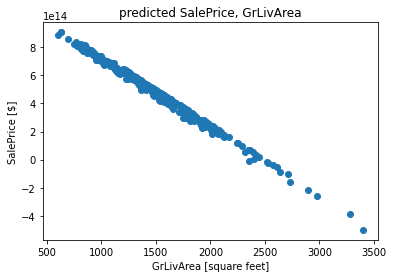

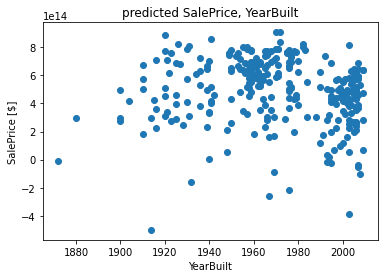

In [98]:
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
%matplotlib inline

X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, random_seed=2)
print('X_train.shape : {}\nX_test.shape : {}'.format(X_train.shape, X_test.shape))
print('y_train.shape : {}\ny_test.shape : {}'.format(y_train.shape, y_test.shape))

reg = SGDRegressor(max_iter=1000)
reg.fit(X_train, y_train.ravel())
print('傾き　：　{}\n切片 : {}'.format(reg.intercept_, reg.coef_))

y_pred = reg.predict(X_test)
MSE = metrics.mean_squared_error(y_test, y_pred)
print('MSE :', MSE)

# 可視化
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test[:, 0], y_pred)
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test[:, 1], y_pred)
plt.show()

傾き　：　[182063.48312018]
切片 : [50524.03039402 31435.13960654]
MSE : 1830126637.603922


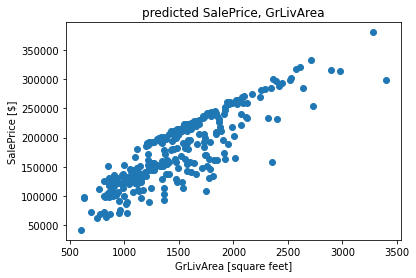

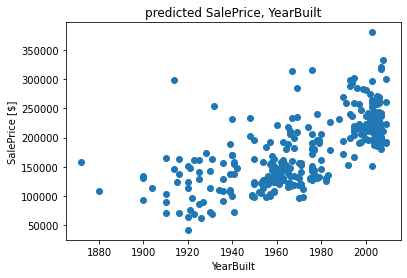

In [103]:
# 標準化してみた
from sklearn.preprocessing import StandardScaler
clf = StandardScaler()
X_train_transformed = clf.fit_transform(X_train)
X_test_trandformed = clf.transform(X_test)

reg = SGDRegressor(max_iter=1000)
reg.fit(X_train_transformed, y_train.ravel())
print('傾き　：　{}\n切片 : {}'.format(reg.intercept_, reg.coef_))

y_pred = reg.predict(X_test_trandformed)
MSE = metrics.mean_squared_error(y_test, y_pred)
print('MSE :', MSE)

# 可視化
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test[:, 0], y_pred)
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test[:, 1], y_pred)
plt.show()

## **感想**
標準化しないと可視化したときにがおかしくなることに気づいた。データ分割関数をスクラッチしたときに、最初にnp.random.permutation（）をXとyの両方に実行していたため、分割後にXとyの整合性が取れなくて苦戦した。同期の方に協力していただき修正することに成功した。